# 1. Import Libraries & Load Data

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Load the datasets
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")
credit_df = pd.read_csv("../data/raw/creditcard.csv")

print("✅ Data loaded successfully.")


✅ Data loaded successfully.


# 2. Basic Info Check

In [9]:
# Fraud Data Overview
print("Fraud Data:")
print(fraud_df.shape)
print(fraud_df.info())

# IP to Country Data
print("\nIP Data:")
print(ip_df.shape)
print(ip_df.info())

# Credit Card Data
print("\nCredit Card Data:")
print(credit_df.shape)
print(credit_df.info())


Fraud Data:
(151112, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

IP Data:
(138846, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------ 

# 3. Check for Duplicates and Nulls

In [10]:
# Check for duplicates
print("Fraud Data Duplicates:", fraud_df.duplicated().sum())
print("Credit Data Duplicates:", credit_df.duplicated().sum())
print("IP Data Duplicates:", ip_df.duplicated().sum())

# Check for null values
print("\nMissing values:")
print("Fraud:", fraud_df.isnull().sum())
print("IP:", ip_df.isnull().sum())
print("Credit:", credit_df.isnull().sum())


Fraud Data Duplicates: 0
Credit Data Duplicates: 1081
IP Data Duplicates: 0

Missing values:
Fraud: user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
IP: lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Credit: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# # Droping Duplicates 

In [11]:
# Remove duplicates from credit card data
credit_df = credit_df.drop_duplicates()
print(f"✅ Removed duplicates. New shape: {credit_df.shape}")


✅ Removed duplicates. New shape: (283726, 31)


# 4. Convert Date Columns + Create time_since_signup

In [12]:
# Convert datetime fields
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Create time_since_signup in minutes
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 60

# Extract hour and day of week
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.day_name()

fraud_df[['signup_time', 'purchase_time', 'time_since_signup', 'hour_of_day', 'day_of_week']].head()


,signup_time,purchase_time,time_since_signup,hour_of_day,day_of_week
0,2015-02-24 22:55:49,2015-04-18 02:47:11,75111.366667,2,Saturday
1,2015-06-07 20:39:50,2015-06-08 01:38:54,299.066667,1,Monday
2,2015-01-01 18:52:44,2015-01-01 18:52:45,0.016667,18,Thursday
3,2015-04-28 21:13:25,2015-05-04 13:54:50,8201.416667,13,Monday
4,2015-07-21 07:09:52,2015-09-09 18:40:53,72691.016667,18,Wednesday


# 5. Visualizations

In [15]:
# Set style - UPDATED VERSION
sns.set_style("whitegrid")  # Use seaborn's whitegrid style
plt.style.use('ggplot')  # Alternative modern style
sns.set_palette("husl")

# Create visualizations directory if it doesn't exist
os.makedirs('../visualizations', exist_ok=True)

## Fraud Data Visualizations

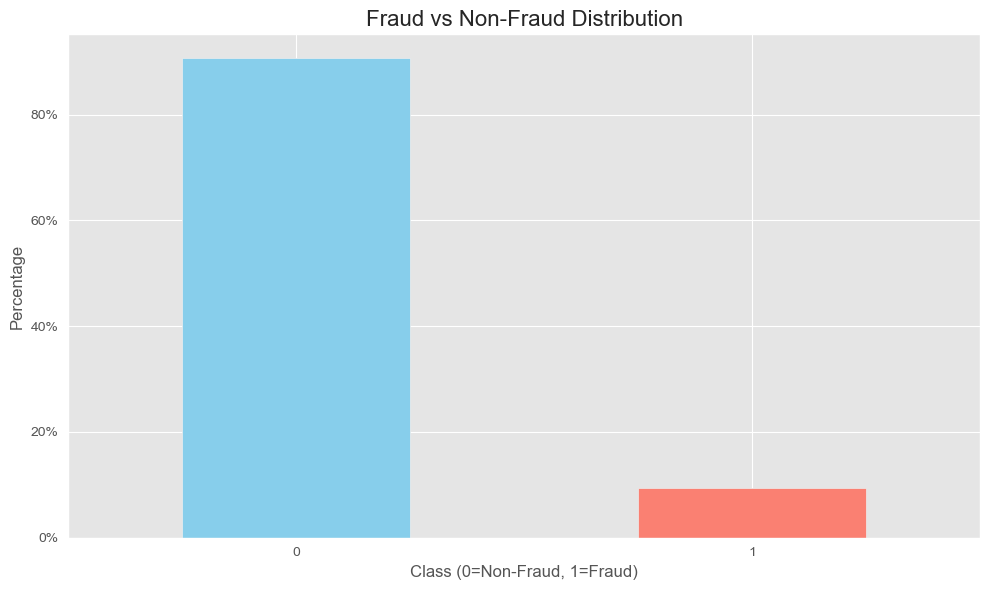

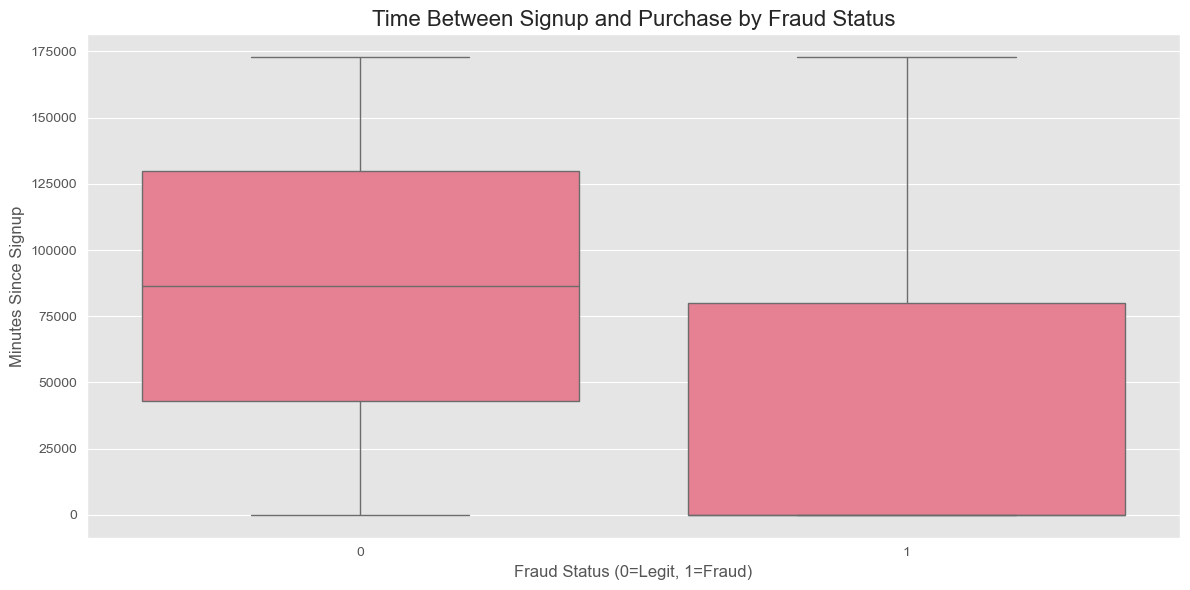

<Figure size 1200x600 with 0 Axes>

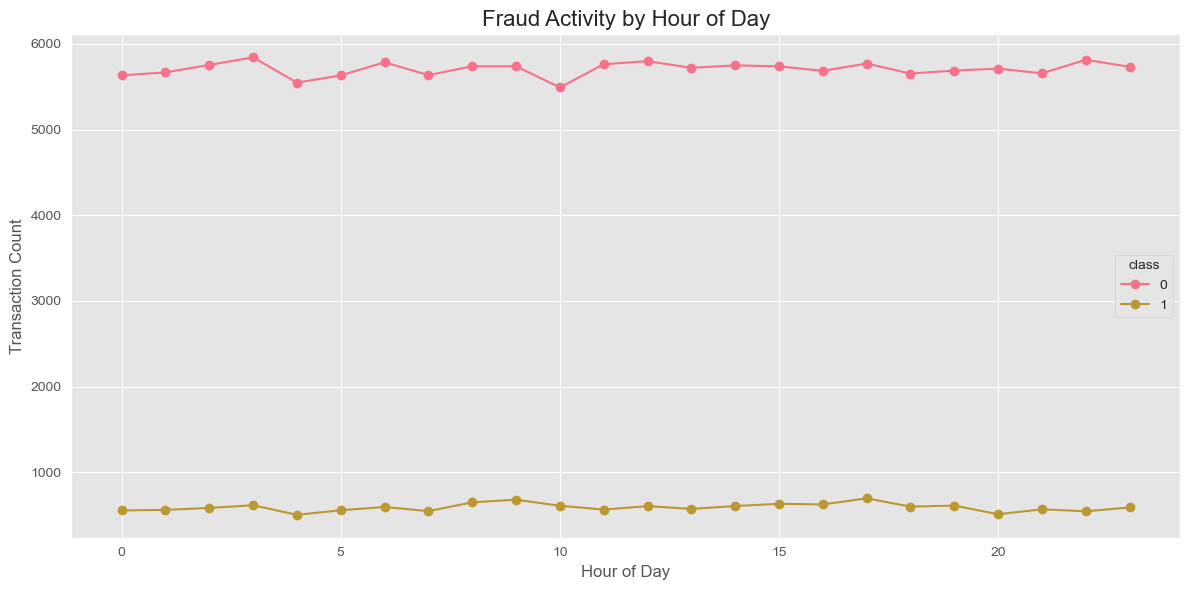

In [16]:

# Fraud Data Visualizations.

# Fraud vs Non-Fraud Distribution
plt.figure(figsize=(10, 6))
fraud_df['class'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Distribution', fontsize=16)
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../visualizations/fraud_distribution.png')
plt.show()

# Time Since Signup vs Fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='time_since_signup', data=fraud_df, showfliers=False)
plt.title('Time Between Signup and Purchase by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0=Legit, 1=Fraud)', fontsize=12)
plt.ylabel('Minutes Since Signup', fontsize=12)
plt.tight_layout()
plt.savefig('../visualizations/time_since_signup_vs_fraud.png')
plt.show()

# Purchase Hour Pattern
plt.figure(figsize=(12, 6))
hourly_fraud = fraud_df.groupby(['hour_of_day', 'class']).size().unstack()
hourly_fraud.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Fraud Activity by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('../visualizations/hourly_fraud_pattern.png')
plt.show()


## Credit card Data Visualizations.

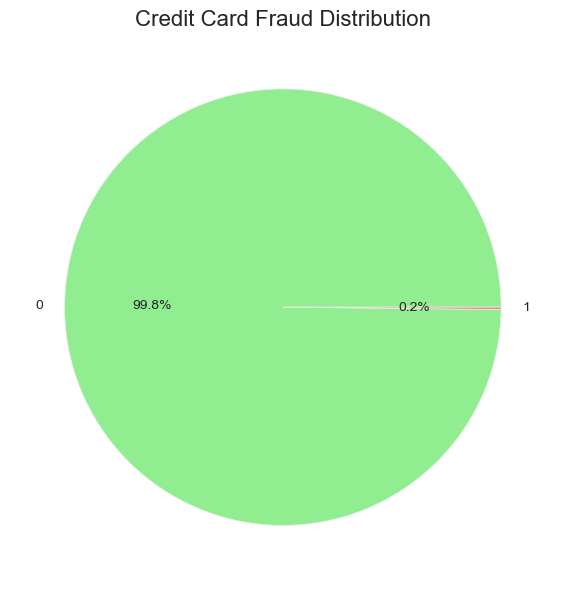

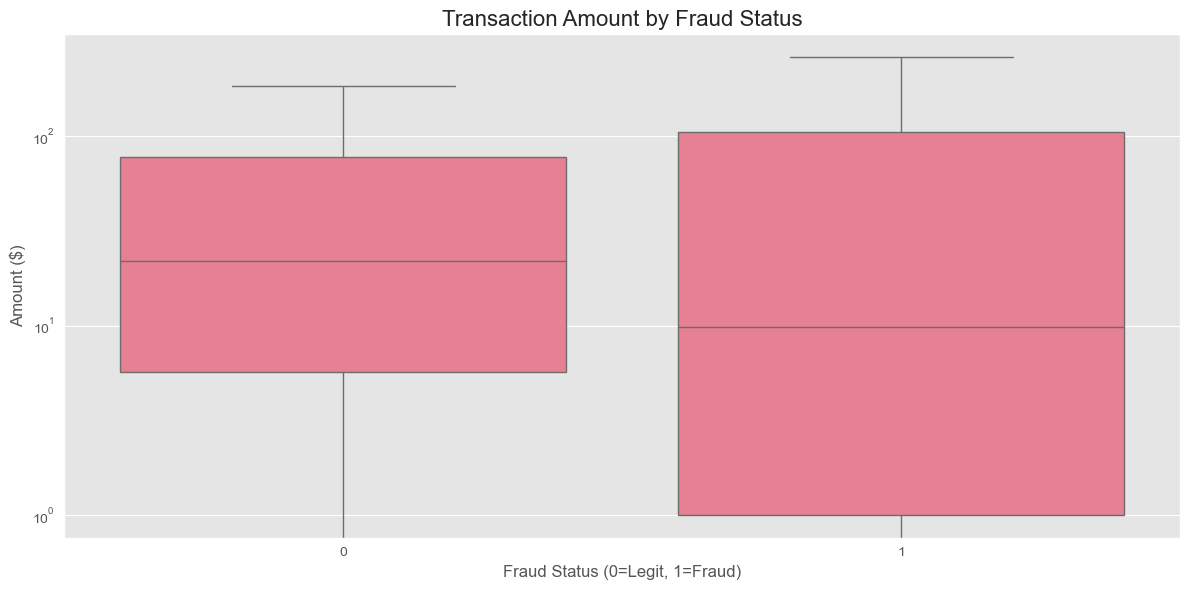

In [19]:
 # Credit Card Data Visualizations.

# Class Distribution
plt.figure(figsize=(10, 6))
credit_df['Class'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', 
                                                   colors=['lightgreen', 'lightcoral'])
plt.title('Credit Card Fraud Distribution', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.savefig('../visualizations/credit_card_class_distribution.png')
plt.show()

# Transaction Amount Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=credit_df, showfliers=False)
plt.title('Transaction Amount by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0=Legit, 1=Fraud)', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.yscale('log')
plt.tight_layout()
plt.savefig('../visualizations/amount_vs_fraud.png')
plt.show()

# 6. Save Cleaned Data

In [6]:
# Save cleaned fraud data
processed_path = "../data/processed/"
os.makedirs(processed_path, exist_ok=True)

fraud_df.to_csv(os.path.join(processed_path, "fraud_cleaned.csv"), index=False)
credit_df.to_csv(os.path.join(processed_path, "creditcard_cleaned.csv"), index=False)

print("✅ Cleaned data saved to /data/processed/")


✅ Cleaned data saved to /data/processed/
